In [2]:
#https://ipython-books.github.io/131-simulating-a-discrete-time-markov-chain/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def calc_plot(arr,dep,x,steps):

    N = 100  # maximum number of cars at an intersection
    a = arr / N  # car arrival rate
    b = dep / N  # car departure rate

    for t in range(nsteps - 1):
        if 0 < x[t] < N - 1:
            # Is there an arrival?
            birth = np.random.default_rng().uniform(0, 1/2) <= a * x[t]
            # Is there a departure?
            death = np.random.default_rng().uniform(0, 1/2) <= b * x[t]
            # We update the population size.
            x[t + 1] = x[t] + 1 * birth - 1 * death


        # The evolution stops if we reach $0$ or $N$.
        else:
            x[t + 1] = x[t]

    return x

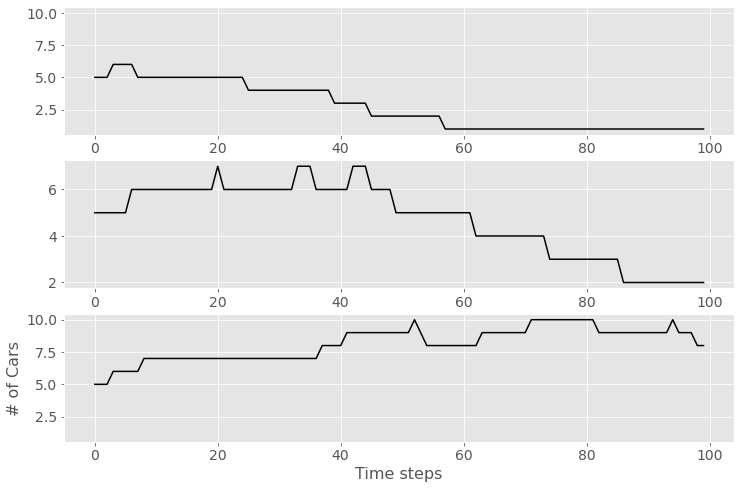

In [23]:
a_m = [0.2, 0.5, 0.7]
plot_data = []



for i in range(3):
    nsteps = 100
    x = np.zeros(nsteps)
    x[0] = 5
    plot_data.append(calc_plot(a_m[i],1-a_m[i],x,nsteps))

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(x, lw=2)
plt.style.use('ggplot')
ax1 = plt.subplot(311)
plt.plot(plot_data[0],color='black')
plt.tick_params('x', labelsize=14)
plt.tick_params('y', labelsize=14)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(plot_data[1],color='black')
# make these tick labels invisible
#plt.tick_params('x', labelbottom=False)
plt.tick_params('x', labelsize=14)
plt.tick_params('y', labelsize=14)


# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(plot_data[2],color='black')
#plt.xlim(0.01, 5.0)
plt.tick_params('x', labelsize=14)
plt.tick_params('y', labelsize=14)
plt.xlabel("Time steps", fontsize=16)
plt.ylabel("# of Cars", fontsize=16)
plt.show()

Now, we will simulate many independent trials of this Markov chain. We could run the previous simulation with a loop, but it would be very slow (two nested for loops). Instead, we vectorize the simulation by considering all independent trials at once. There is a single loop over time. At every time step, we update all trials simultaneously with vectorized operations on vectors. The x vector now contains the population size of all trials, at a particular time. At initialization time, the population sizes are set to random numbers between 0 and N:

In [6]:
N = 100  # maximum number of cars at an intersection
a = 0.5 / N  # car arrival rate
b = 0.5 / N  # car departure rate
ntrials = 100

x = np.random.randint(size=ntrials, low=0, high=N)
print(x)
#x = np.random.pareto(3, ntrials)
#x = [round(i) for i in x]
#print(x)

[24 77 91 80 43 42 65 41 55 52 23 33 47 53 17 98 85 28 93  4 79 55 68 77
 36  4 99 18 49 23 83 40 10 12 91 38 51 30  1 76 75 13 89  1  0 26 23 90
 88 13  7 26 61 91 37 50 62 80 97 13 94 41 61 15  9 91 89 88 27 62 62 58
  5 50 26 65 30 58  5 90  8 89 33 19  2 15 76  5 51 40 79 48 38 72 24 36
 21  4 50 45]


We define a function that performs the simulation. At every time step, we find the trials that undergo births and deaths by generating random vectors, and we update the population sizes with vector operations:

In [7]:
def simulate(x, nsteps,a,b):
    """Run the simulation."""
    for _ in range(nsteps - 1):
        # Which trials to update?
        upd = (0 < x) & (x < N - 1)
        # In which trials do births occur?
        ####birth = 1 * (np.random.rand(ntrials) <= a * x)
        birth = 1 * (np.random.pareto(ntrials) <= a * x)
        # In which trials do deaths occur?
        ####death = 1 * (np.random.rand(ntrials) <= b * x)
        death = 1 * (np.random.pareto(ntrials) <= b * x)
        # We update the population size for all trials
        x[upd] += birth[upd] - death[upd]

Now, let's look at the histograms of the population size at different times. These histograms represent the probability distribution of the Markov chain, estimated with independent trials (the Monte Carlo method):

Text(0.5, 0.98, 'Population size')

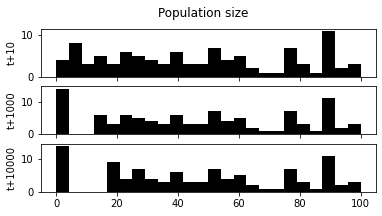

In [8]:
bins = np.linspace(0, N, 25)

nsteps_list = [10, 1000, 10000]#, 100000, 1000000]
fig, axes = plt.subplots(3, #len(nsteps_list),
                         figsize=(6, 3),
                         sharex=True)
for i, nsteps in enumerate(nsteps_list):
    ax = axes[i]
    simulate(x, nsteps,a,b)
    #print(x, "\nAVG: ", np.average(x))
    ax.hist(x, bins=bins, color='black')
    #ax.plot(x, color='black')
    #ax.set_xlabel("Population size")
    ax.set_ylabel(f"t+{nsteps}")

fig.suptitle("Population size")
#ax.grid(True)

## Simulate Map

In [9]:
#LATEST 9/19